# American Community Survey 5 Year Estimate Table B05015 - Place of Birth by Year of Entry for the Foreign-born Population

### This notebook is an exploration of the data from the above mentioned table specifically with regards to Census tracts within a 0.5 mile radius of the Del Mar Station along the L (Gold) Line in Pasadena, CA.

#### By Kevin Liu

1) Importing packages to be able to manipulate data

In [1]:
import pandas as pd

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


2. Importing geojson dataset (Table B05015) and inspecting data

In [2]:
gdf = gpd.read_file('acs2019_5yr_B05015.geojson')

In [3]:
gdf.shape

(2347, 65)

In [4]:
gdf.head()

,geoid,name,B05015001,"B05015001, Error",B05015002,"B05015002, Error",B05015003,"B05015003, Error",B05015004,"B05015004, Error",...,"B05015027, Error",B05015028,"B05015028, Error",B05015029,"B05015029, Error",B05015030,"B05015030, Error",B05015031,"B05015031, Error",geometry
0,05000US06037,"Los Angeles County, CA",3430507.0,14119.0,288054.0,4584.0,76162.0,2634.0,211892.0,3307.0,...,1076.0,87568.0,2277.0,989775.0,8062.0,173834.0,3797.0,815941.0,6993.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1424.0,326.0,13.0,25.0,0.0,12.0,13.0,25.0,...,12.0,0.0,12.0,910.0,256.0,130.0,79.0,780.0,249.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",810.0,180.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,690.0,149.0,36.0,36.0,654.0,140.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3167.0,438.0,0.0,17.0,0.0,17.0,0.0,17.0,...,17.0,0.0,17.0,2054.0,299.0,198.0,182.0,1856.0,279.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1749.0,251.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,1120.0,252.0,147.0,118.0,973.0,226.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


3) Trimming columns and rows, and renaming columns

In [7]:
list(gdf)

['geoid',
 'name',
 'B05015001',
 'B05015001, Error',
 'B05015002',
 'B05015002, Error',
 'B05015003',
 'B05015003, Error',
 'B05015004',
 'B05015004, Error',
 'B05015005',
 'B05015005, Error',
 'B05015006',
 'B05015006, Error',
 'B05015007',
 'B05015007, Error',
 'B05015008',
 'B05015008, Error',
 'B05015009',
 'B05015009, Error',
 'B05015010',
 'B05015010, Error',
 'B05015011',
 'B05015011, Error',
 'B05015012',
 'B05015012, Error',
 'B05015013',
 'B05015013, Error',
 'B05015014',
 'B05015014, Error',
 'B05015015',
 'B05015015, Error',
 'B05015016',
 'B05015016, Error',
 'B05015017',
 'B05015017, Error',
 'B05015018',
 'B05015018, Error',
 'B05015019',
 'B05015019, Error',
 'B05015020',
 'B05015020, Error',
 'B05015021',
 'B05015021, Error',
 'B05015022',
 'B05015022, Error',
 'B05015023',
 'B05015023, Error',
 'B05015024',
 'B05015024, Error',
 'B05015025',
 'B05015025, Error',
 'B05015026',
 'B05015026, Error',
 'B05015027',
 'B05015027, Error',
 'B05015028',
 'B05015028, Error',
 

In [8]:
# deleting margin of error columns

columns_to_keep =['geoid',
 'name',
 'B05015001',
 'B05015002',
 'B05015003',
 'B05015004',
 'B05015005',
 'B05015006',
 'B05015007',
 'B05015008',
 'B05015009',
 'B05015010',
 'B05015011',
 'B05015012',
 'B05015013',
 'B05015014',
 'B05015015',
 'B05015016',
 'B05015017',
 'B05015018',
 'B05015019',
 'B05015020',
 'B05015021',
 'B05015022',
 'B05015023',
 'B05015024',
 'B05015025',
 'B05015026',
 'B05015027',
 'B05015028',
 'B05015029',
 'B05015030',
 'B05015031',
 'geometry']

In [9]:
gdf = gdf[columns_to_keep]

In [10]:
gdf.head()

,geoid,name,B05015001,B05015002,B05015003,B05015004,B05015005,B05015006,B05015007,B05015008,...,B05015023,B05015024,B05015025,B05015026,B05015027,B05015028,B05015029,B05015030,B05015031,geometry
0,05000US06037,"Los Angeles County, CA",3430507.0,288054.0,76162.0,211892.0,17332.0,1356.0,15976.0,12687.0,...,239804.0,31931.0,207873.0,98409.0,10841.0,87568.0,989775.0,173834.0,815941.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1424.0,13.0,0.0,13.0,8.0,0.0,8.0,0.0,...,172.0,61.0,111.0,0.0,0.0,0.0,910.0,130.0,780.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",810.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,...,78.0,0.0,78.0,0.0,0.0,0.0,690.0,36.0,654.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3167.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,...,76.0,0.0,76.0,0.0,0.0,0.0,2054.0,198.0,1856.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1749.0,0.0,0.0,0.0,29.0,0.0,29.0,36.0,...,79.0,12.0,67.0,0.0,0.0,0.0,1120.0,147.0,973.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [12]:
# renaming columns

gdf.columns = ['geoid',
 'name',
'Total',
'China, Hong Kong, and Taiwan',
'Entered 2010 or later',
'Entered before 2010',
'Cuba',
'Entered 2010 or later',
'Entered before 2010',
'Dominican Republic',
'Entered 2010 or later',
'Entered before 2010',
'El Salvador',
'Entered 2010 or later',
'Entered before 2010',
'Guatemala',
'Entered 2010 or later',
'Entered before 2010',
'India',
'Entered 2010 or later',
'Entered before 2010',
'Mexico',
'Entered 2010 or later',
'Entered before 2010',
'Philippines',
'Entered 2010 or later',
'Entered before 2010',
'Vietnam',
'Entered 2010 or later',
'Entered before 2010',
'All Other Countries',
'Entered 2010 or later',
'Entered before 2010',
'geometry']

In [14]:
gdf.head()

,geoid,name,Total,"China, Hong Kong, and Taiwan",Entered 2010 or later,Entered before 2010,Cuba,Entered 2010 or later,Entered before 2010,Dominican Republic,...,Philippines,Entered 2010 or later,Entered before 2010,Vietnam,Entered 2010 or later,Entered before 2010,All Other Countries,Entered 2010 or later,Entered before 2010,geometry
0,05000US06037,"Los Angeles County, CA",3430507.0,288054.0,76162.0,211892.0,17332.0,1356.0,15976.0,12687.0,...,239804.0,31931.0,207873.0,98409.0,10841.0,87568.0,989775.0,173834.0,815941.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1424.0,13.0,0.0,13.0,8.0,0.0,8.0,0.0,...,172.0,61.0,111.0,0.0,0.0,0.0,910.0,130.0,780.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",810.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,...,78.0,0.0,78.0,0.0,0.0,0.0,690.0,36.0,654.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3167.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,...,76.0,0.0,76.0,0.0,0.0,0.0,2054.0,198.0,1856.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1749.0,0.0,0.0,0.0,29.0,0.0,29.0,36.0,...,79.0,12.0,67.0,0.0,0.0,0.0,1120.0,147.0,973.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [15]:
# trimming top row since it's just showing us totals

gdf = gdf.drop([0])

In [16]:
gdf.head()

,geoid,name,Total,"China, Hong Kong, and Taiwan",Entered 2010 or later,Entered before 2010,Cuba,Entered 2010 or later,Entered before 2010,Dominican Republic,...,Philippines,Entered 2010 or later,Entered before 2010,Vietnam,Entered 2010 or later,Entered before 2010,All Other Countries,Entered 2010 or later,Entered before 2010,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1424.0,13.0,0.0,13.0,8.0,0.0,8.0,0.0,...,172.0,61.0,111.0,0.0,0.0,0.0,910.0,130.0,780.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",810.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,...,78.0,0.0,78.0,0.0,0.0,0.0,690.0,36.0,654.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3167.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,...,76.0,0.0,76.0,0.0,0.0,0.0,2054.0,198.0,1856.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1749.0,0.0,0.0,0.0,29.0,0.0,29.0,36.0,...,79.0,12.0,67.0,0.0,0.0,0.0,1120.0,147.0,973.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1658.0,25.0,8.0,17.0,0.0,0.0,0.0,0.0,...,17.0,0.0,17.0,0.0,0.0,0.0,1525.0,184.0,1341.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


4. Filtering out the relevant Census tracts that are within 0.5 miles radius of the Del Mar Station along the L Line + renaming dataset to "delmar"

In [17]:
delmar = gdf[gdf["geoid"].isin(['14000US06037461902', 
                                '14000US06037462202', 
                                '14000US06037463601', 
                                '14000US06037463602', 
                                '14000US06037463700', 
                                '14000US06037463900', 
                                '14000US06037464000']
)
            ]

In [18]:
delmar.head()

,geoid,name,Total,"China, Hong Kong, and Taiwan",Entered 2010 or later,Entered before 2010,Cuba,Entered 2010 or later,Entered before 2010,Dominican Republic,...,Philippines,Entered 2010 or later,Entered before 2010,Vietnam,Entered 2010 or later,Entered before 2010,All Other Countries,Entered 2010 or later,Entered before 2010,geometry
1362,14000US06037461902,"Census Tract 4619.02, Los Angeles, CA",586.0,285.0,148.0,137.0,0.0,0.0,0.0,0.0,...,27.0,0.0,27.0,11.0,0.0,11.0,228.0,110.0,118.0,"MULTIPOLYGON (((-118.15570 34.14973, -118.1554..."
1367,14000US06037462202,"Census Tract 4622.02, Los Angeles, CA",1003.0,198.0,80.0,118.0,8.0,0.0,8.0,0.0,...,11.0,4.0,7.0,29.0,0.0,29.0,669.0,430.0,239.0,"MULTIPOLYGON (((-118.14147 34.14940, -118.1414..."
1383,14000US06037463601,"Census Tract 4636.01, Los Angeles, CA",1824.0,693.0,346.0,347.0,0.0,0.0,0.0,19.0,...,65.0,0.0,65.0,10.0,0.0,10.0,693.0,221.0,472.0,"MULTIPOLYGON (((-118.14145 34.14584, -118.1397..."
1384,14000US06037463602,"Census Tract 4636.02, Los Angeles, CA",1926.0,509.0,144.0,365.0,6.0,0.0,6.0,0.0,...,68.0,30.0,38.0,0.0,0.0,0.0,989.0,604.0,385.0,"MULTIPOLYGON (((-118.15046 34.14577, -118.1497..."
1385,14000US06037463700,"Census Tract 4637, Los Angeles, CA",602.0,191.0,68.0,123.0,0.0,0.0,0.0,0.0,...,32.0,0.0,32.0,0.0,0.0,0.0,308.0,58.0,250.0,"MULTIPOLYGON (((-118.16776 34.14147, -118.1676..."


In [21]:
# wanted to see the entire dataset, so getting rid of limits on viewing the data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [22]:
delmar

,geoid,name,Total,"China, Hong Kong, and Taiwan",Entered 2010 or later,Entered before 2010,Cuba,Entered 2010 or later,Entered before 2010,Dominican Republic,Entered 2010 or later,Entered before 2010,El Salvador,Entered 2010 or later,Entered before 2010,Guatemala,Entered 2010 or later,Entered before 2010,India,Entered 2010 or later,Entered before 2010,Mexico,Entered 2010 or later,Entered before 2010,Philippines,Entered 2010 or later,Entered before 2010,Vietnam,Entered 2010 or later,Entered before 2010,All Other Countries,Entered 2010 or later,Entered before 2010,geometry
1362,14000US06037461902,"Census Tract 4619.02, Los Angeles, CA",586.0,285.0,148.0,137.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,28.0,0.0,28.0,27.0,0.0,27.0,11.0,0.0,11.0,228.0,110.0,118.0,"MULTIPOLYGON (((-118.15570 34.14973, -118.1554..."
1367,14000US06037462202,"Census Tract 4622.02, Los Angeles, CA",1003.0,198.0,80.0,118.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,21.0,49.0,18.0,8.0,10.0,11.0,4.0,7.0,29.0,0.0,29.0,669.0,430.0,239.0,"MULTIPOLYGON (((-118.14147 34.14940, -118.1414..."
1383,14000US06037463601,"Census Tract 4636.01, Los Angeles, CA",1824.0,693.0,346.0,347.0,0.0,0.0,0.0,19.0,19.0,0.0,19.0,0.0,19.0,53.0,0.0,53.0,182.0,114.0,68.0,90.0,14.0,76.0,65.0,0.0,65.0,10.0,0.0,10.0,693.0,221.0,472.0,"MULTIPOLYGON (((-118.14145 34.14584, -118.1397..."
1384,14000US06037463602,"Census Tract 4636.02, Los Angeles, CA",1926.0,509.0,144.0,365.0,6.0,0.0,6.0,0.0,0.0,0.0,97.0,0.0,97.0,0.0,0.0,0.0,180.0,21.0,159.0,77.0,19.0,58.0,68.0,30.0,38.0,0.0,0.0,0.0,989.0,604.0,385.0,"MULTIPOLYGON (((-118.15046 34.14577, -118.1497..."
1385,14000US06037463700,"Census Tract 4637, Los Angeles, CA",602.0,191.0,68.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,10.0,61.0,0.0,61.0,32.0,0.0,32.0,0.0,0.0,0.0,308.0,58.0,250.0,"MULTIPOLYGON (((-118.16776 34.14147, -118.1676..."
1387,14000US06037463900,"Census Tract 4639, Los Angeles, CA",624.0,174.0,83.0,91.0,32.0,0.0,32.0,0.0,0.0,0.0,9.0,0.0,9.0,9.0,0.0,9.0,0.0,0.0,0.0,71.0,0.0,71.0,38.0,13.0,25.0,11.0,0.0,11.0,280.0,0.0,280.0,"MULTIPOLYGON (((-118.16805 34.12392, -118.1677..."
1388,14000US06037464000,"Census Tract 4640, Los Angeles, CA",1037.0,397.0,191.0,206.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,6.0,27.0,0.0,27.0,75.0,0.0,75.0,88.0,0.0,88.0,19.0,0.0,19.0,412.0,105.0,307.0,"MULTIPOLYGON (((-118.15038 34.13577, -118.1495..."


5. Experimenting with plotting data

<AxesSubplot:>

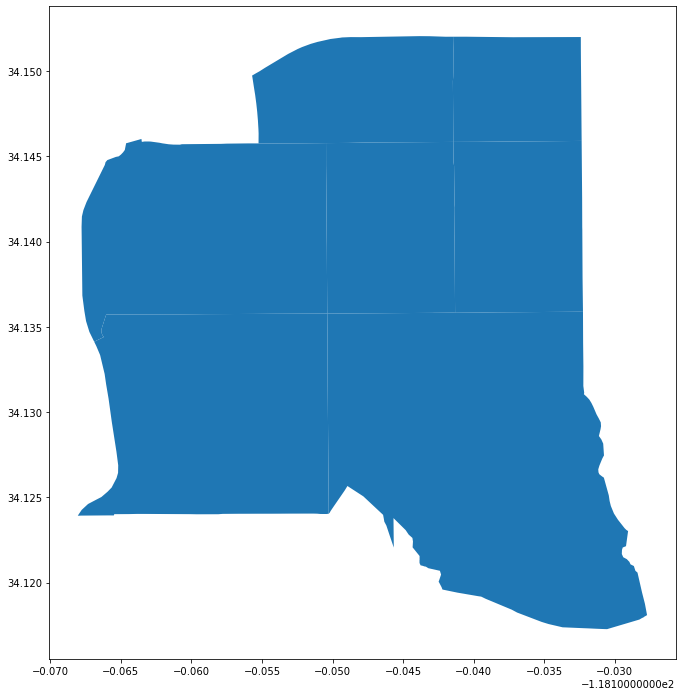

In [23]:
# just plotting first to make sure we have something that looks like the area around Delmar Station

delmar.plot(figsize = (12,12))

In [24]:
# before we start experiment with maps, let's normalize the data

delmar['Percent From China, Hong Kong, and Taiwan'] = delmar['China, Hong Kong, and Taiwan']/delmar['Total']*100
delmar['Percent From Cuba'] = delmar['Cuba']/delmar['Total']*100
delmar['Percent From Dominican Republic'] = delmar['Dominican Republic']/delmar['Total']*100
delmar['Percent From El Salvador'] = delmar['El Salvador']/delmar['Total']*100
delmar['Percent From Guatemala'] = delmar['Guatemala']/delmar['Total']*100
delmar['Percent From India'] = delmar['India']/delmar['Total']*100
delmar['Percent From Mexico'] = delmar['Mexico']/delmar['Total']*100
delmar['Percent From Philippines'] = delmar['Philippines']/delmar['Total']*100
delmar['Percent From Vietnam'] = delmar['Vietnam']/delmar['Total']*100
delmar['Percent From Mexico'] = delmar['Mexico']/delmar['Total']*100
delmar['Percent From All Other Countries'] = delmar['All Other Countries']/delmar['Total']*100

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [25]:
# checking that the columns were added

delmar

,geoid,name,Total,"China, Hong Kong, and Taiwan",Entered 2010 or later,Entered before 2010,Cuba,Entered 2010 or later,Entered before 2010,Dominican Republic,Entered 2010 or later,Entered before 2010,El Salvador,Entered 2010 or later,Entered before 2010,Guatemala,Entered 2010 or later,Entered before 2010,India,Entered 2010 or later,Entered before 2010,Mexico,Entered 2010 or later,Entered before 2010,Philippines,Entered 2010 or later,Entered before 2010,Vietnam,Entered 2010 or later,Entered before 2010,All Other Countries,Entered 2010 or later,Entered before 2010,geometry,"Percent From China, Hong Kong, and Taiwan",Percent From Cuba,Percent From Dominican Republic,Percent From El Salvador,Percent From Guatemala,Percent From India,Percent From Mexico,Percent From Philippines,Percent From Vietnam,Percent From All Other Countries
1362,14000US06037461902,"Census Tract 4619.02, Los Angeles, CA",586.0,285.0,148.0,137.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,0.0,28.0,0.0,28.0,27.0,0.0,27.0,11.0,0.0,11.0,228.0,110.0,118.0,"MULTIPOLYGON (((-118.15570 34.14973, -118.1554...",48.634812,0.000000,0.000000,0.000000,0.000000,1.194539,4.778157,4.607509,1.877133,38.907850
1367,14000US06037462202,"Census Tract 4622.02, Los Angeles, CA",1003.0,198.0,80.0,118.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,21.0,49.0,18.0,8.0,10.0,11.0,4.0,7.0,29.0,0.0,29.0,669.0,430.0,239.0,"MULTIPOLYGON (((-118.14147 34.14940, -118.1414...",19.740778,0.797607,0.000000,0.000000,0.000000,6.979063,1.794616,1.096710,2.891326,66.699900
1383,14000US06037463601,"Census Tract 4636.01, Los Angeles, CA",1824.0,693.0,346.0,347.0,0.0,0.0,0.0,19.0,19.0,0.0,19.0,0.0,19.0,53.0,0.0,53.0,182.0,114.0,68.0,90.0,14.0,76.0,65.0,0.0,65.0,10.0,0.0,10.0,693.0,221.0,472.0,"MULTIPOLYGON (((-118.14145 34.14584, -118.1397...",37.993421,0.000000,1.041667,1.041667,2.905702,9.978070,4.934211,3.563596,0.548246,37.993421
1384,14000US06037463602,"Census Tract 4636.02, Los Angeles, CA",1926.0,509.0,144.0,365.0,6.0,0.0,6.0,0.0,0.0,0.0,97.0,0.0,97.0,0.0,0.0,0.0,180.0,21.0,159.0,77.0,19.0,58.0,68.0,30.0,38.0,0.0,0.0,0.0,989.0,604.0,385.0,"MULTIPOLYGON (((-118.15046 34.14577, -118.1497...",26.427830,0.311526,0.000000,5.036345,0.000000,9.345794,3.997923,3.530633,0.000000,51.349948
1385,14000US06037463700,"Census Tract 4637, Los Angeles, CA",602.0,191.0,68.0,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,10.0,61.0,0.0,61.0,32.0,0.0,32.0,0.0,0.0,0.0,308.0,58.0,250.0,"MULTIPOLYGON (((-118.16776 34.14147, -118.1676...",31.727575,0.000000,0.000000,0.000000,0.000000,1.661130,10.132890,5.315615,0.000000,51.162791
1387,14000US06037463900,"Census Tract 4639, Los Angeles, CA",624.0,174.0,83.0,91.0,32.0,0.0,32.0,0.0,0.0,0.0,9.0,0.0,9.0,9.0,0.0,9.0,0.0,0.0,0.0,71.0,0.0,71.0,38.0,13.0,25.0,11.0,0.0,11.0,280.0,0.0,280.0,"MULTIPOLYGON (((-118.16805 34.12392, -118.1677...",27.884615,5.128205,0.000000,1.442308,1.442308,0.000000,11.378205,6.089744,1.762821,44.871795
1388,14000US06037464000,"Census Tract 4640, Los Angeles, CA",1037.0,397.0,191.0,206.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,6.0,27.0,0.0,27.0,75.0,0.0,75.0,88.0,0.0,88.0,19.0,0.0,19.0,412.0,105.0,307.0,"MULTIPOLYGON (((-118.15038 34.13577, -118.1495...",38.283510,1.253616,0.000000,0.000000,0.578592,2.603664,7.232401,8.486017,1.832208,39.729990


6. Mapping Data

<AxesSubplot:>

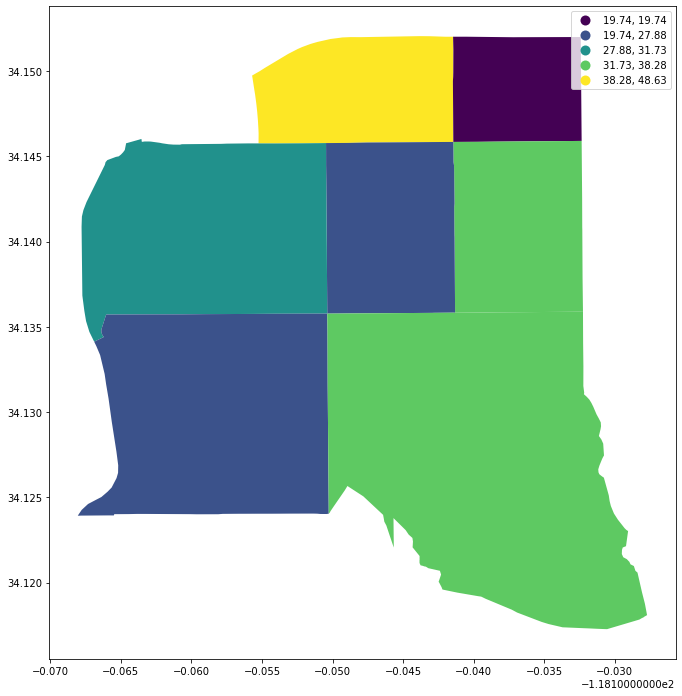

In [26]:
# messing around with some chloropleth maps and intervals

delmar.plot(figsize=(12,12),
                 column='Percent From China, Hong Kong, and Taiwan',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot:>

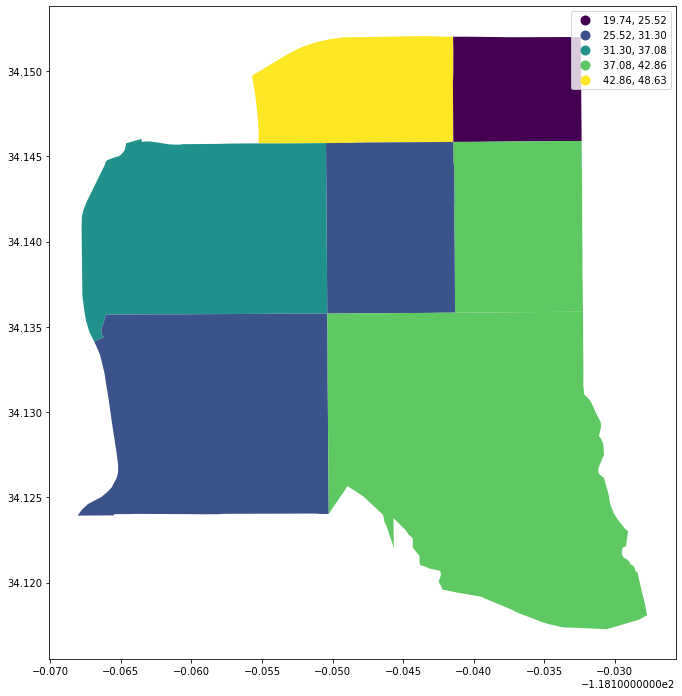

In [49]:
delmar.plot(figsize=(12,12),
                 column='Percent From China, Hong Kong, and Taiwan',
                 legend=True, 
                 scheme='equal_interval')

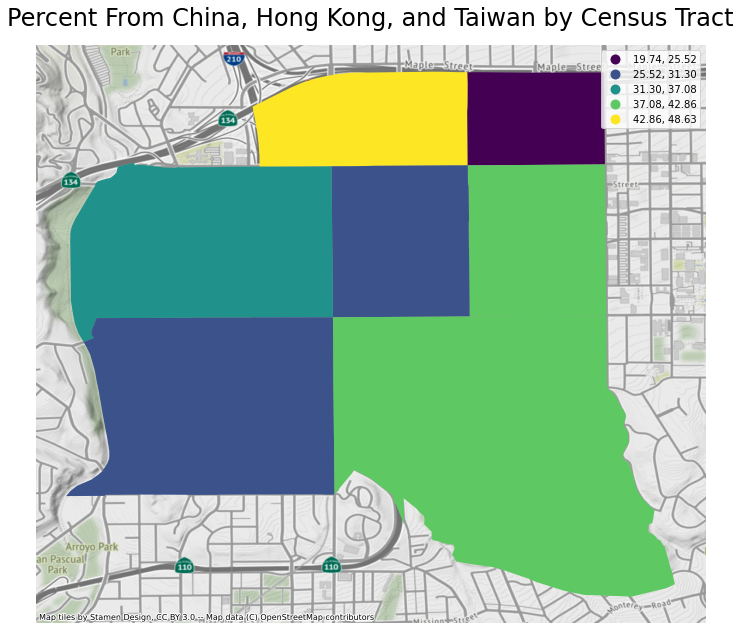

In [52]:
# adding basemap

ax = delmar.plot(figsize=(12,12),
                 column='Percent From China, Hong Kong, and Taiwan',
                 legend=True, 
                 scheme='equal_interval')

# no axes
ax.axis('off')

# title
ax.set_title('Percent From China, Hong Kong, and Taiwan by Census Tract',fontsize=24,pad=20)

ctx.add_basemap(ax, crs=delmar.crs.to_string())

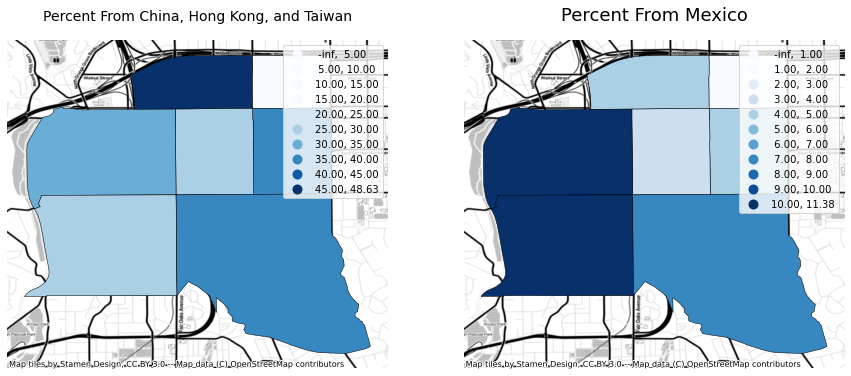

In [89]:
# creating subplots to compare different country of origin populations

# set sharex and sharey to true to scale each map equally
fig, axs = plt.subplots(1, 2, figsize=(15, 12), sharex=True, sharey=True)

# name each subplot
ax1, ax2 = axs

# percent from China map on the left
delmar.plot(column='Percent From China, Hong Kong, and Taiwan', 
            cmap='Blues', 
            scheme='user_defined', 
            classification_kwds={'bins':[5, 10, 15, 20, 25, 30, 35, 40, 45]}, 
            edgecolor='black', 
            linewidth=0.5, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis('off')

ax1.set_title('Percent From China, Hong Kong, and Taiwan',fontsize=14,pad=20)

ctx.add_basemap(ax1, crs=delmar.crs.to_string(), source=ctx.providers.Stamen.Toner)

# percent from Mexico map on the right
delmar.plot(column='Percent From Mexico', 
            cmap='Blues', 
            scheme='user_defined', 
            classification_kwds={'bins':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, 
            edgecolor='black', 
            linewidth=0.5, 
            ax=ax2,
            legend=True
           )

ax2.axis('off')

ax2.set_title('Percent From Mexico', fontsize=18,pad=20)

ctx.add_basemap(ax2, crs=delmar.crs.to_string(), source=ctx.providers.Stamen.Toner)